# 2020 Rolex 24 Hours of Daytona

## All-Cars Plot  
Data from [IMSA Results](http://results.imsa.com/).

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
from matplotlib import colors
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from datetime import datetime
from matplotlib.dates import date2num, datestr2num, num2date
pd.plotting.register_matplotlib_converters()
mpl.rcParams['font.sans-serif'] = "AppleGothic"
pd.set_option('display.max_rows', 80)
pd.set_option('display.max_columns', 80)

In [2]:
data = pd.read_csv("./data/t9.csv", delimiter=";", header=0, skipinitialspace=True, index_col=False).fillna(0)
timeformat = '%H:%M:%S.%f'
data['time'] = pd.to_datetime(data.loc[:,'HOUR'], format=timeformat)
#data['time'] = pd.to_datetime(data['HOUR'], format=timeformat).dt.strftime('%H:%M:%S')
data.head(2)

,NUMBER,DRIVER_NUMBER,LAP_NUMBER,LAP_TIME,LAP_IMPROVEMENT,CROSSING_FINISH_LINE_IN_PIT,S1,S1_IMPROVEMENT,S2,S2_IMPROVEMENT,S3,S3_IMPROVEMENT,KPH,ELAPSED,HOUR,S1_LARGE,S2_LARGE,S3_LARGE,TOP_SPEED,DRIVER_NAME,PIT_TIME,CLASS,GROUP,TEAM,MANUFACTURER,Unnamed: 25,time
0,10,1,1,1:40.409,0,0,34.757,0,36.980,0,28.672,0,205.4,1:40.409,13:42:27.322,0:34.757,0:36.980,0:28.672,0.0,Ryan Briscoe,0,DPi,0.0,Konica Minolta Cadillac DPi-V.R,Cadillac,0.0,1900-01-01 13:42:27.322
1,10,1,2,1:36.958,0,0,32.302,0,36.265,0,28.391,0,212.7,3:17.367,13:44:04.280,0:32.302,0:36.265,0:28.391,0.0,Ryan Briscoe,0,DPi,0.0,Konica Minolta Cadillac DPi-V.R,Cadillac,0.0,1900-01-01 13:44:04.280


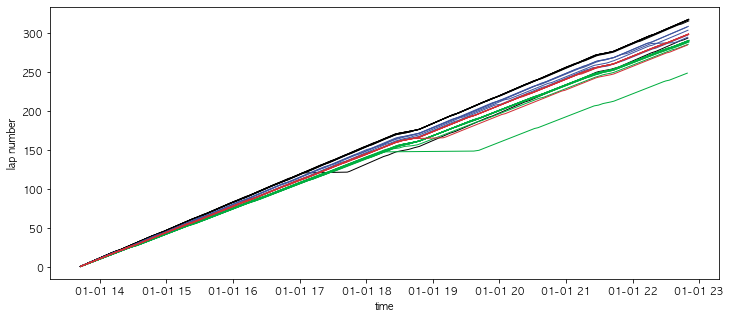

In [71]:
fig = plt.subplots(figsize=(12,5))
classes = ("DPi", "GTD", "LMP2", "GTLM")
colors = {"DPi": 'k', "LMP2": '#3d549f', "GTLM": '#d03037', "GTD": '#00ae3f'}
for c in classes:
    temp = data.loc[data['CLASS'] == c]
    color = colors.get(c, '#D3D3D3')
    for i in  temp['NUMBER'].unique():
        plotdata = temp.loc[data['NUMBER'] == i]
        plt.plot_date(plotdata['time'], plotdata['LAP_NUMBER'], label=i, markersize=0, linestyle='-', linewidth=1,\
                     color=color)
plt.ylabel("lap number")
plt.xlabel("time");
#plt.xlim(datetime.strptime("22:01:01.0", timeformat),datetime.strptime("22:51:01.0", timeformat))
#plt.ylim(240,320)

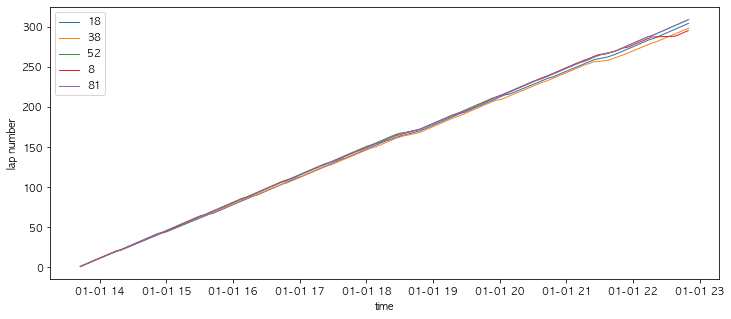

In [29]:
# plot a single class
fig = plt.subplots(figsize=(12,5))
classes = ("DPi", "GTD", "LMP2", "GTLM")
colors = {"DPi": 'k', "LMP2": '#3d549f', "GTLM": '#d03037', "GTD": '#00ae3f'}
#for c in classes:
for c in ["LMP2"]:
    temp = data.loc[data['CLASS'] == c]
    color = colors.get(c, '#D3D3D3')
    for i in  temp['NUMBER'].unique():
        plotdata = temp.loc[data['NUMBER'] == i]
        plt.plot_date(plotdata['time'], plotdata['LAP_NUMBER'], label=i, markersize=0, linestyle='-', linewidth=1)
plt.ylabel("lap number")
plt.xlabel("time")
#plt.xlim(datetime.strptime("22:01:01.0", timeformat),datetime.strptime("22:51:01.0", timeformat))
#plt.ylim(240,320)
plt.legend();

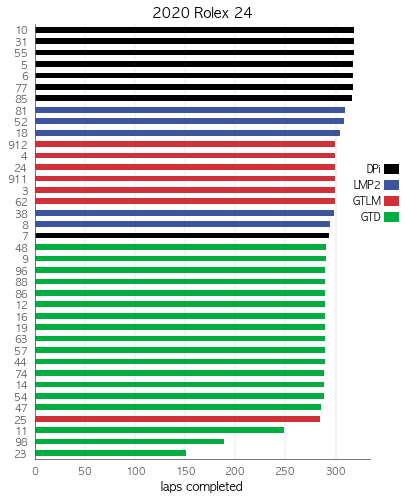

In [70]:
bardata = data[['NUMBER','CLASS','LAP_NUMBER']].groupby('NUMBER').max().reset_index().sort_values(by='LAP_NUMBER')
fig, ax2 = plt.subplots(figsize=(6,8))
bardata.plot.barh(x='NUMBER', y='LAP_NUMBER', ax=ax2, grid=False, legend=False, edgecolor = "none",\
                 color=[colors.get(i, '#D3D3D3') for i in bardata['CLASS']])
#ax2.legend(handles=patches, bbox_to_anchor=(1, 0), framealpha=0, markerfirst=False, \
#          loc='lower right', ncol=1, numpoints=1, fancybox=True, handlelength=.5)
ax2.tick_params(labelcolor='#565656')
ax2.set_xlabel('laps completed', fontsize=12)
ax2.xaxis.set_ticks_position('none')
ax2.yaxis.set_ticks_position('none')
ax2.yaxis.label.set_visible(False)
ax2.set_title('2020 Rolex 24', fontsize=14, y=1)
ax2.spines['bottom'].set_color('#565656')
ax2.spines['left'].set_color('#565656')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.grid(color='#565656', axis='x', linestyle='-', linewidth=0.25, alpha=0.5)
# legend
hues = ["k", "#3d549f", "#d03037", "#00ae3f"]
texts = ["DPi", "LMP2", "GTLM", "GTD"]
patches = [ plt.plot([],[], color=hues[i], linewidth=10,\
                     label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]
ax2.legend(handles=patches, bbox_to_anchor=(1.1, .7), framealpha=0, markerfirst=False, \
          loc='upper right', ncol=1, numpoints=1, fancybox=True, handlelength=.5);